# Yahoo Finance Dataset Analysis

In [1]:
!pip install dtw-python

In [2]:
# Here we have useful import
from dtw import *
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.style.use('seaborn')
# plt.rc("figure", figsize=(10,10))  # size of the figure

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



## Set constant variable

In [3]:
DIR_DATA = "yahoo_finance_dataset/AAPL_daily_update.csv"

## Dataset

We decide to download the yahoo finance dataset of Apple, more precisily the one that contains daily update in order to analyze the differences of each day.

In [4]:
df = pd.read_csv(DIR_DATA)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-10,53.465000,54.195000,52.927502,54.174999,53.642761,127111600
1,2019-09-11,54.517502,55.927502,54.432499,55.897499,55.348343,177158400
2,2019-09-12,56.200001,56.605000,55.715000,55.772499,55.224567,128906800
3,2019-09-13,55.000000,55.197498,54.255001,54.687500,54.150230,159053200
4,2019-09-16,54.432499,55.032501,54.389999,54.974998,54.434902,84632400
...,...,...,...,...,...,...,...
249,2020-09-03,126.910004,128.839996,120.500000,120.879997,120.879997,257599600
250,2020-09-04,120.070000,123.699997,110.889999,120.959999,120.959999,332607200
251,2020-09-08,113.949997,118.989998,112.680000,112.820000,112.820000,231366600
252,2020-09-09,117.260002,119.139999,115.260002,117.320000,117.320000,176276400


In the dataset there are no missing values, since we check it using the function isna().sum(), so we don't need to do some preprocessing operations.

### DTW

In [5]:
def compute_dtw(data, col1="close", col2="volume"):
    x = data[col1]
    y = data[col2]
    
    # DTW Parameters: see https://dynamictimewarping.github.io/py-api/html/api/dtw.dtw.html#dtw.dtw
    
    plt.rc("figure", figsize=(10,10))  # size of the figure
    dtw(x, y, keep_internals=True).plot(type="threeway", xlab=col1, ylab=col2)

    plt.rc("figure", figsize=(30,8))  # size of the figure
    dtw(x, y, keep_internals=True, 
        step_pattern=rabinerJuangStepPattern(ptype=4, slope_weighting="d"))\
        .plot(type="twoway", offset=-6).legend((col1, col2), loc="upper left")


### Analysis

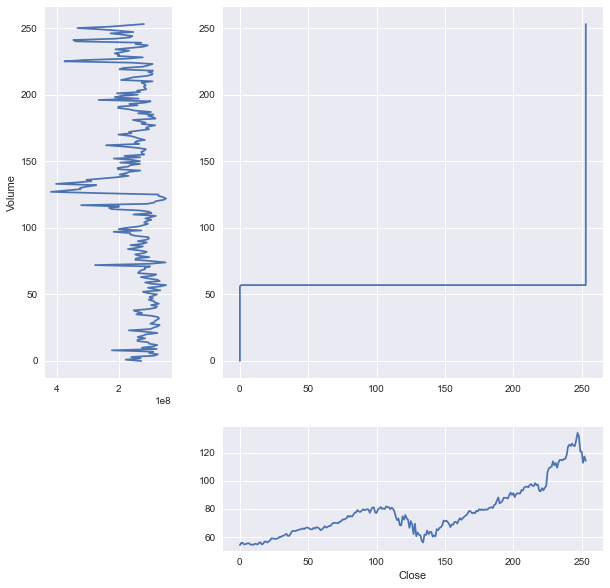

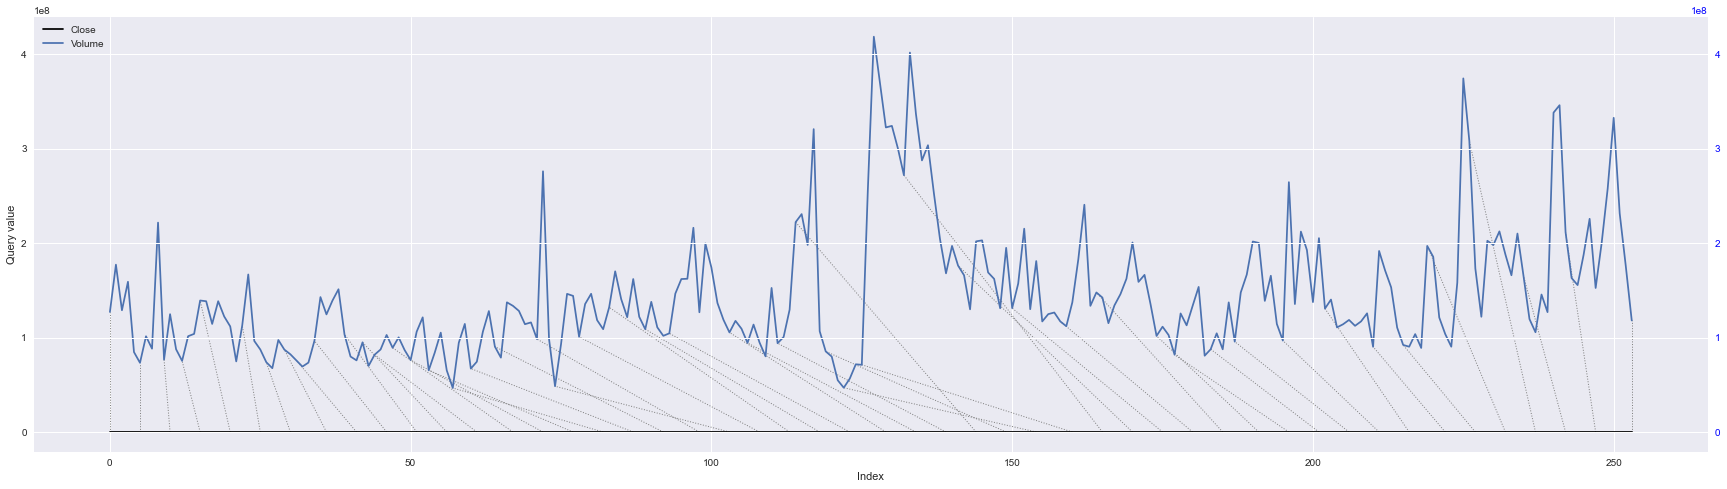

In [6]:
compute_dtw(df, "Close", "Volume")